<h1 align="center"><font size="5">Rainfall Prediction Australia</font></h1>


# Overview


In this notebook, different machine learning classification algorithms will be implemented for the Australian rainfall dataset. Models will be built using the training data, and their performance will be evaluated on the testing data using various metrics.

The following algorithms will be implemented:

1. Linear Regression
2. K-Nearest Neighbors (KNN)
3. Decision Trees
4. Logistic Regression
5. Support Vector Machines (SVM)

The models' performance will be evaluated using these metrics:

1. Accuracy Score
2. Jaccard Index
3. F1-Score
4. Log Loss
5. Mean Absolute Error
6. Mean Squared Error
7. R-squared (R²) Score

Finally, a report summarizing the results will be generated based on the models' evaluations.

# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [114]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , log_loss

### Importing the Dataset


In [115]:
df = pd.read_csv("Weather_Data.csv")

In [116]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

### Data Preprocessing


#### One Hot Encoding


Performing one hot encoding to convert categorical variables to binary variables.


In [117]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Replacing the values of the 'RainTomorrow' column changing them from a categorical column to a binary column.  the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and which is not needed, since 'RainTomorrow' is our target.


In [118]:
pd.set_option('future.no_silent_downcasting', True)
df_sydney_processed.replace(['No', 'Yes'], [0, 1], inplace=True)

### Training Data and Test Data


In [119]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [120]:
df_sydney_processed = df_sydney_processed.astype(float)

In [121]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


Using the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [122]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

Creating and training a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [123]:
LinearReg = LinearRegression()

In [124]:
LinearReg.fit(x_train,y_train)

LinearRegression()

In [125]:
predictions = LinearReg.predict(x_test)

In [126]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [127]:
#Enter Your Code and Execute
Report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

In [128]:
print(Report)

  Metric     Value
0    MAE  0.256318
1    MSE  0.115721
2     R2  0.427132


### KNN


In [129]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [130]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [131]:
predictions = KNN.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

In [133]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, average='macro')
KNN_F1_Score = f1_score(y_test, predictions, average='macro')

In [134]:
print(f"KNN Accuracy Score: {KNN_Accuracy_Score}")
print(f"KNN Jaccard Index: {KNN_JaccardIndex}")
print(f"KNN F1 Score: {KNN_F1_Score}")

KNN Accuracy Score: 0.8183206106870229
KNN Jaccard Index: 0.6076221148684917
KNN F1 Score: 0.7396843950905903


### Decision Tree


In [135]:
Tree = DecisionTreeClassifier()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [136]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
predictions = Tree.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

In [139]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average='macro')
Tree_F1_Score = f1_score(y_test, predictions, average='macro')

In [140]:
report_data = {
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Value': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
}

report_df = pd.DataFrame(report_data)

print(report_df)

           Metric     Value
0  Accuracy Score  0.749618
1   Jaccard Index  0.547782
2        F1 Score  0.695086


### Logistic Regression


In [141]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=1)

In [142]:
LR = LogisticRegression(solver='liblinear')

In [143]:
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [144]:
predictions = LR.predict(x_test)

In [145]:
predict_proba = LR.predict_proba(x_test)

In [146]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, average='macro')
LR_F1_Score = f1_score(y_test, predictions, average='macro')
LR_Log_Loss = log_loss(y_test, predict_proba)

### SVM


In [147]:
from sklearn.svm import SVC

In [148]:
SVM = SVC()

In [149]:
SVM.fit(x_train, y_train)

SVC()

In [150]:
predictions = SVM.predict(x_test)

In [151]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, average='macro')
SVM_F1_Score = f1_score(y_test, predictions, average='macro')

### Report


In [152]:
report_data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Index': [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVM_JaccardIndex],
    'F1-Score': [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score],
    'LogLoss': [LR_Log_Loss, 'N/A', 'N/A', 'N/A']  
}

Report = pd.DataFrame(report_data)

print(Report)

                 Model  Accuracy  Jaccard Index  F1-Score   LogLoss
0  Logistic Regression  0.836641       0.656242  0.782850  0.380451
1                  KNN  0.818321       0.607622  0.739684       N/A
2        Decision Tree  0.749618       0.547782  0.695086       N/A
3                  SVM  0.722137       0.361069  0.419326       N/A


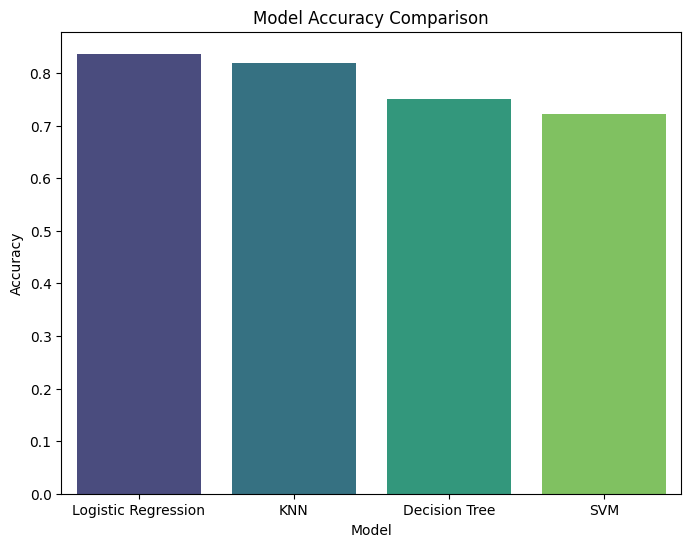

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=Report, hue='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

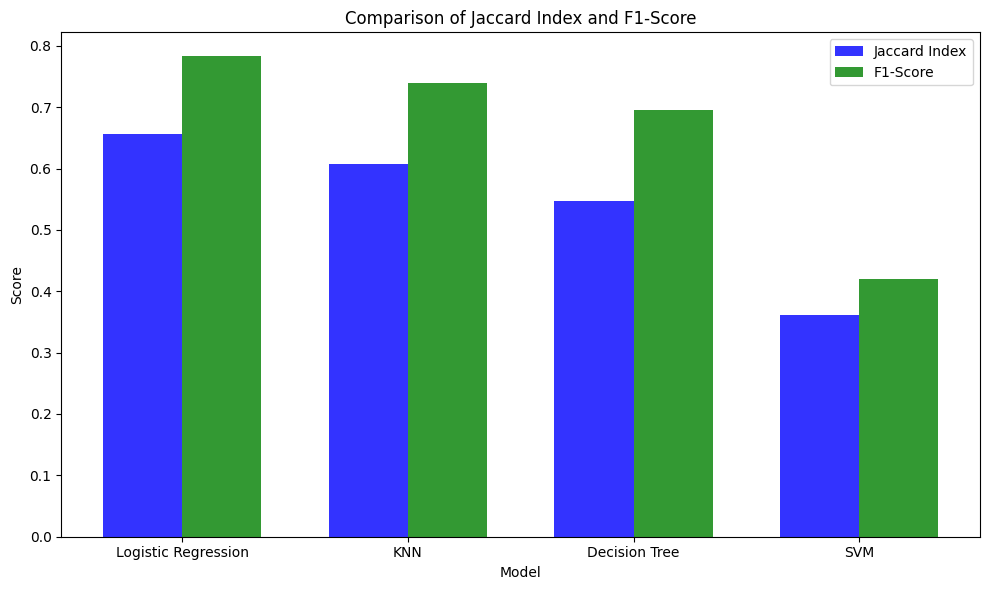

In [161]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(Report['Model']))
plt.bar(index, Report['Jaccard Index'], bar_width, alpha=0.8, label='Jaccard Index', color='blue')
plt.bar(index + bar_width, Report['F1-Score'], bar_width, alpha=0.8, label='F1-Score', color='green')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Jaccard Index and F1-Score')
plt.xticks(index + bar_width / 2, Report['Model'])
plt.legend()
plt.tight_layout()
plt.show()


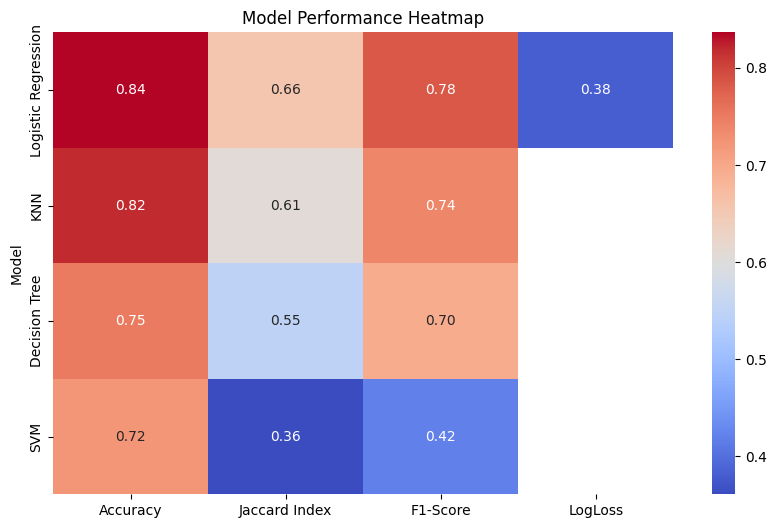

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(Report.set_index('Model').replace('N/A', None).astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Model Performance Heatmap')
plt.show()

Based on the evaluation of multiple classification models, **Logistic Regression** emerged as the best-performing model, achieving an accuracy of 83.66%, a Jaccard Index of 0.6562, and an F1-Score of 0.7828. These metrics indicate strong performance in predicting rainfall, and the model’s Log Loss of 0.3805 suggests that it is well-calibrated, making it a reliable choice for this task. The **K-Nearest Neighbors (KNN)** model also performed well, with an accuracy of 81.83%, a Jaccard Index of 0.6076, and an F1-Score of 0.7397, though it lacks a Log Loss metric. **Decision Tree**, with an accuracy of 74.96%, showed moderate performance but might be less consistent, as indicated by its Jaccard Index of 0.5478 and F1-Score of 0.6951, which suggests it could be prone to overfitting. Lastly, the **Support Vector Machine (SVM)** struggled the most, with the lowest accuracy (72.21%), a Jaccard Index of 0.3611, and an F1-Score of 0.4193, suggesting it was less effective at distinguishing between rain predictions. In conclusion, **Logistic Regression** is the most suitable model for accurately predicting rainfall, followed closely by **KNN**, while **Decision Tree** and **SVM** may require further optimization for improved results.